In [2]:
from keras.datasets import imdb
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
model = Sequential()

In [7]:
model.add(Dense(16, input_shape=(10000,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
fitting_data = model.fit(partial_x_train,
                         partial_y_train,
                         epochs=20,
                         batch_size=512,
                         validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 29s 2ms/step - loss: 0.5465 - accuracy: 0.7633 - val_loss: 0.4246 - val_accuracy: 0.8696
Epoch 2/20
15000/15000 [==============================] - 11s 747us/step - loss: 0.3384 - accuracy: 0.9007 - val_loss: 0.3248 - val_accuracy: 0.8851
Epoch 3/20
15000/15000 [==============================] - 4s 260us/step - loss: 0.2435 - accuracy: 0.9255 - val_loss: 0.2881 - val_accuracy: 0.8908
Epoch 4/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.1929 - accuracy: 0.9379 - val_loss: 0.2759 - val_accuracy: 0.8894
Epoch 5/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.1566 - accuracy: 0.9499 - val_loss: 0.2824 - val_accuracy: 0.8869
Epoch 6/20
15000/15000 [==============================] - 3s 224us/step - loss: 0.1277 - accuracy: 0.9611 - val_loss: 0.3072 - val_accuracy: 0.8804
Epoch 7/20
15000/15000 [==============================] - 3s 2

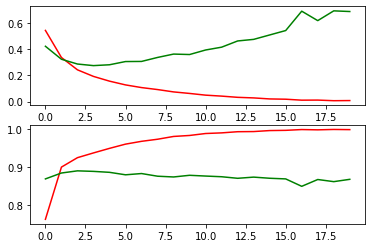

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(fitting_data.history['loss'], c='r')
ax1.plot(fitting_data.history['val_loss'], c='g')

ax2.plot(fitting_data.history['accuracy'], c='r')
ax2.plot(fitting_data.history['val_accuracy'], c='g')

plt.show()

In [32]:
model2 = Sequential()

In [33]:
model2.add(Dense(16, activation='relu', input_shape=(10000,)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [34]:
fitting_data = model2.fit(partial_x_train, 
                          partial_y_train, epochs=5, 
                          batch_size=512, 
                          validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 13s 845us/step - loss: 0.5484 - accuracy: 0.7429 - val_loss: 0.4212 - val_accuracy: 0.8479
Epoch 2/5
15000/15000 [==============================] - 4s 235us/step - loss: 0.3306 - accuracy: 0.8973 - val_loss: 0.3289 - val_accuracy: 0.8783
Epoch 3/5
15000/15000 [==============================] - 3s 229us/step - loss: 0.2432 - accuracy: 0.9243 - val_loss: 0.3021 - val_accuracy: 0.8810
Epoch 4/5
15000/15000 [==============================] - 3s 228us/step - loss: 0.1899 - accuracy: 0.9404 - val_loss: 0.2810 - val_accuracy: 0.8858
Epoch 5/5
15000/15000 [==============================] - 4s 256us/step - loss: 0.1557 - accuracy: 0.9499 - val_loss: 0.2828 - val_accuracy: 0.8854


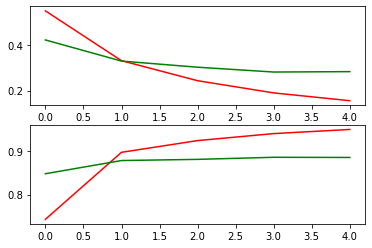

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(fitting_data.history['loss'], c='r')
ax1.plot(fitting_data.history['val_loss'], c='g')

ax2.plot(fitting_data.history['accuracy'], c='r')
ax2.plot(fitting_data.history['val_accuracy'], c='g')

plt.show()

In [25]:
model.predict(x_test)

array([[0.00628689],
       [0.99999815],
       [0.6902405 ],
       ...,
       [0.00154421],
       [0.00870442],
       [0.9080291 ]], dtype=float32)

In [ ]:
model2.predict(x_test)